In [2]:
import numpy as np 
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import matplotlib.pyplot as plt
from numpy.linalg import inv
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

The following code will read "Normal Dataset" dataset from a text file , I show parse dataset because it is in text file with some text and we have a numpy dataframe for proccessing .

In [3]:
file = open("Data_Normal.txt","r")
data  = file.read()
data = data[32:]
data = data.replace("\n",";")
data = data.replace("\r","")
data = data.split(";")
data = data[:180]
data= pd.to_numeric(data)
normaldata = np.reshape(data,(-1,3))
#print (normaldata)

Read Data_With_Outlier from a textfile  , simplere than above script :

In [4]:
data=np.loadtxt('Data_With_Outlier.txt', delimiter=';')
outlierdata  = np.array(data)
unnormalized = outlierdata
#print (outlierdata)

Following code are for Normalizing data .
Actually for Normalizing data we subtract min of each column from entries of that column and then devide it by (max - min) where max and min denotes maximum value and minimum value of the column respectively. 
I used MinMaxScalar() from sklearn library . 
all data values scale between 0 and 1.

In [5]:
def normalize(data):
    scaler = MinMaxScaler()
    scaler.fit(data)
    data = scaler.transform(data)
    return data

normaldata = normalize(normaldata)
outlierdata = normalize(outlierdata)
#print (normaldata)
#print (outlierdata)

Following Function get thee dataset as input and plot the dataset in 2D.
Blue points for women
Red points for men

In [6]:
def plotdataset(data):
    dataset = pd.DataFrame(data)
    dataset.columns = ["Height", "Weight", "Sex"]
    col = dataset.Sex.map({0: 'b', 1: 'r'})
    dataset.plot.scatter(x='Height', y='Weight', c=col)
    #sns.lmplot(x='Height', y='Weight', data=dataset, fit_reg=True)
    plt.show()

Plot each data set as a scatter diagram :


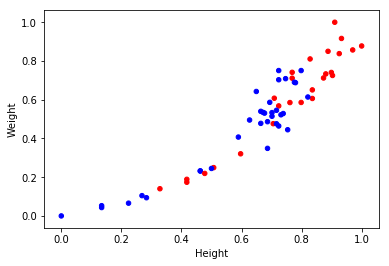

In [7]:
plotdataset(normaldata) #Plot Normal data

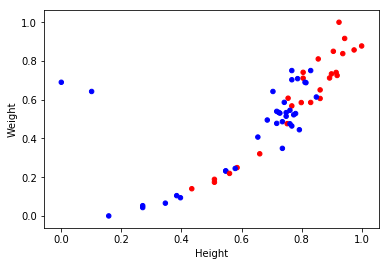

In [8]:
plotdataset(outlierdata)   #Plot data with Outlier

Following function  will draw a line in a dataset , the line denotes the regression line .
Inputs are two parametere for the line and the dataset



In [9]:
def drawLine(a0, a1, dataset):
    # Normalize the dataset out of func
    dataset = pd.DataFrame(dataset)
    dataset.columns = ["Height", "Weight", "Sex"]
    col = dataset.Sex.map({0: 'b', 1: 'r'})
    plt.scatter(dataset['Height'], dataset['Weight'], c=col)
    plt.plot([0, 1], [a0, a0 + a1], 'r')
    plt.show()

The following function train a linear regression model on a Normalized dataset .
It uses "CLOSED FORM SOLUTION" to get the coefficients of the regression line.  
The function gets the dataset as input.

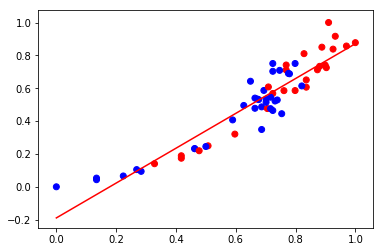

In [10]:
def closedform(data):
    data = normalize(data)
    temp = data
    y = data[:, 1]
    data = np.insert(data, 0, 1, axis=1)
    data = data[:, [0, 1]]
    coeffs =  inv(data.transpose().dot(data)).dot(data.transpose()).dot(y)

    drawLine(coeffs[0],coeffs[1],temp)
    
closedform(normaldata)


Linear regression by Batch Gradient Descent , learning rate as input:


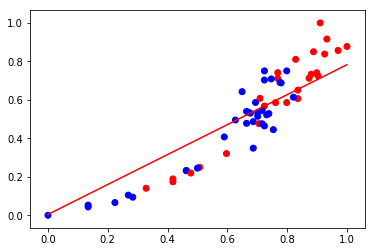

In [11]:
def hypothesis(theta, x):
    return np.dot(x, theta)


def cost(y, ytilda):
    return np.subtract(ytilda, y)


def costall (y, ytilda):
    temp = cost(y,ytilda)
    return np.transpose(temp).dot(temp)

def batchgradientdescent(data, learningRate):
    temp = data
    data = np.insert(data, 0, 1, axis=1)
    x = data[:, [0,1]]
    y = data[:, 2]
    theta = [np.random.random_sample(), np.random.random_sample()]
    lr = learningRate/len(data)

    costs = []

    for i in range(2000):
        theta0 = 0
        theta1 = 0
        costarr = cost(y, hypothesis(theta, x))
        costs= costs + ([theta[0], theta[1], costall(y, hypothesis(theta, x))])
        for j in range(len(data)):     #computing partial derivetive of Cost Func to theta0 and theta1
            theta0 = theta0 + costarr[j]
            theta1 = theta1 + costarr[j]*x[:,1][j]
        theta = np.subtract(theta, [lr*theta0, lr*theta1])

    drawLine(theta[0], theta[1], temp)
    return costs

costbatch = batchgradientdescent(normaldata,0.01)

The Following function Get get some points in 3D space to Plot the cost function for the above linear regression :


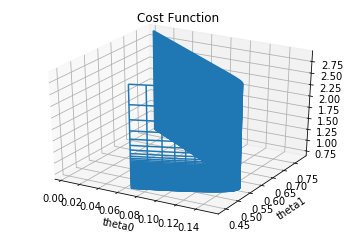

In [12]:
def drawcost(costs):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    w = np.array(costs)
    w = w.reshape(-1,3)
    ax.plot_wireframe(np.array(w[:, 0]), np.array(w[:, 1]), np.array(w[:,2]).reshape(-1,1), rstride=10, cstride=10)
    plt.title("Cost Function")
    plt.xlabel("theta0")
    plt.ylabel("theta1")
    plt.show()
    
drawcost(costbatch)

Linear regression by stochastic gradient descent :
    

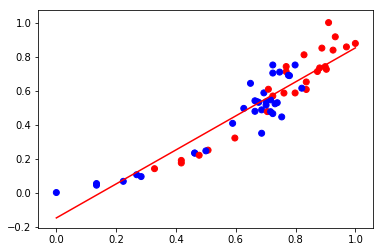

In [13]:
def stochasticgradientdescent(data, learningRate):
    temp  = data
    data = np.insert(data, 0, 1, axis=1)
    x = data[:, [0,1]]
    y = data[:, 2]
    x=np.array(x)
    y=np.array(y)
    m = len(y)
    theta = [np.random.random_sample(), np.random.random_sample()]
    lr = learningRate /m
    costs = []

    for i in range(2000):
        costs = costs +[theta[0], theta[1], costall(y, hypothesis(theta, x))]
        for j in range(m):
            random = np.random.randint(0, m)
            x_i = np.array(x[random, :])
            y_i = np.array(y[random])
            hyp = hypothesis(theta, x_i)
            theta0 = (hyp - y_i)
            theta1 = theta0 * x_i[1]
            theta = np.subtract(theta, [lr*theta0, lr*theta1])

    drawLine(theta[0], theta[1], temp)
    return costs

coststochastic = stochasticgradientdescent(normaldata,0.03)

Cost function for the above model:

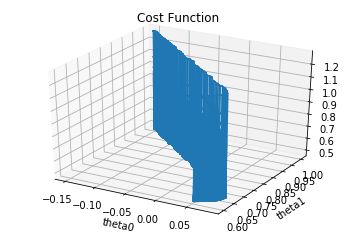

In [14]:
drawcost(coststochastic)

The following codes are weighted linear regression
bacht gradient descent for weighted linear regression:


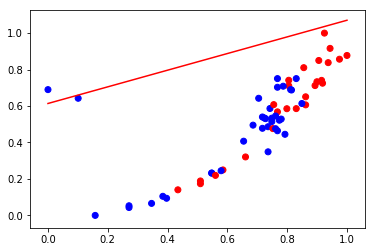

In [15]:
def bachtgradientweighted(data, learningrate):
    temp2 = data
    data = normalize(data)
    temp = data
    data = np.insert(data, 0, 1, axis=1)
    x = data[:, [0,1]]
    y = data[:, 2]
    theta = [np.random.random_sample(), np.random.random_sample()]

    cov = np.cov(temp2)

    w = np.diag(np.diag(cov))

    w = inv(w)

    lr = learningrate/len(data)

    costs = []

    for i in range(2000):
        theta0 = 0
        theta1 = 0
        costarr = cost(y, hypothesis(theta, x))
        costs= costs + ([theta[0], theta[1], costall(y, hypothesis(theta, x))])
        for j in range(len(data)):     #computing partial derivetive of Cost Func to theta0 and theta1
            theta0 = theta0 + costarr[j]*w[j][j]
            theta1 = theta1 + costarr[j]*x[:,1][j]*w[j][j]
        theta = np.subtract(theta, [lr*theta0, lr*theta1])

    drawLine(theta[0], theta[1], temp)
    return costs

weightedbachcostt = bachtgradientweighted(unnormalized,1)

Closed form Solution for weighted linear regression :

2


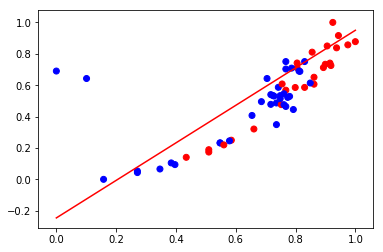

In [16]:
def closedformweighted(data):
    cov = np.cov(data)
    temp = data
    y = data[:, 1]
    data = np.insert(data, 0, 1, axis=1)
    data = data[:, [0, 1]]


    w = np.diag(np.diag(cov))

    w = inv(w)

    theta = inv(np.transpose(data).dot(w.dot(data))).dot(np.transpose(data).dot(w.dot(y)))
    print (len(theta))
    drawLine(theta[0], theta[1], temp)
closedformweighted(outlierdata)

Explanatory Questions:

1. if we change Learning rate the learned model will differese each time,  i.e  if we choose learning too small we will have slow  Convergence and have time cost on the other hand if we choose learning rate large then J(theta) may not decrease on every iteration and may not converge. so we can test choosing learning rate by following sequence and select the best one : 0.001 , 0.003 , 0.001 , 0.003 , 0.01 , 0.03 , 0.1 , 0.3 , 1 ...



2. Yes the outlier data some how distract the conventional way of training learning model , i.e Variance of outlier data is high so the are anomaly datas that can created by noise but the contribute in training model and lead to a bad results so we should decrease their present when we train the model


3. I have Explained how to normalize . when scale of each feature differes alot we should normalize data because each data point should have equal scale to each feature 


4. In weighted linear regression when we use closed form solution we get better model .


5. when we have outlier data definitly weighted linear regression is better .
